<a href="https://colab.research.google.com/github/CristiSavca/DataScience-MicroCredential/blob/main/Heart_Attack_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mission Statement: Analyze and visualize the heart_attack.csv dataset from (https://raw.githubusercontent.com/CristiSavca/ML_Data/main/heart_attack%20-%20heart_attack.csv) to assist in making predictions on classifying whether a person is likely to have a heart attack or not depending on multiple factors, and then test the accuracy of the predictions. To do this we will use a Logistic Regression model and a Random Forest model.

# Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/CristiSavca/ML_Data/main/heart_attack%20-%20heart_attack.csv")

In [3]:
df.columns

Index(['male', 'age', 'education', 'current_smoker', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'tot_chol', 'sys_bp',
       'dia_bp', 'bmi', 'heart_rate', 'glucose', 'heart_attack'],
      dtype='object')

# EDA

In [5]:
df.head()

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   male              3656 non-null   int64  
 1   age               3656 non-null   int64  
 2   education         3656 non-null   int64  
 3   current_smoker    3656 non-null   int64  
 4   cigs_per_day      3656 non-null   int64  
 5   bp_meds           3656 non-null   int64  
 6   prevalent_stroke  3656 non-null   int64  
 7   prevalent_hyp     3656 non-null   int64  
 8   diabetes          3656 non-null   int64  
 9   tot_chol          3656 non-null   int64  
 10  sys_bp            3656 non-null   float64
 11  dia_bp            3656 non-null   float64
 12  bmi               3656 non-null   float64
 13  heart_rate        3656 non-null   int64  
 14  glucose           3656 non-null   int64  
 15  heart_attack      3656 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 457

In [7]:
df.describe()

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
attack = (df['heart_attack']==1).sum()
noattack = (df['heart_attack']==0).sum()
ans = [attack, noattack]

ans

[557, 3099]

In [10]:
557/3099

0.1797353985156502

roughly 18% of dataset people had heart attacks

In [11]:
df.head()

,male,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_attack
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [12]:
df.columns

Index(['male', 'age', 'education', 'current_smoker', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'tot_chol', 'sys_bp',
       'dia_bp', 'bmi', 'heart_rate', 'glucose', 'heart_attack'],
      dtype='object')

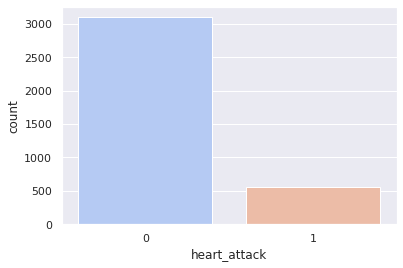

In [16]:
sns.countplot(x ='heart_attack', data = df, palette='coolwarm')

Visualization of heart-attack count compared to non-heart-attack count.

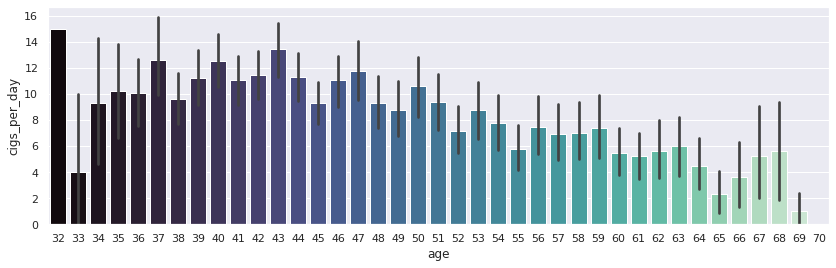

In [32]:
plt.figure(figsize=(14,4))
sns.barplot(x='age', y='cigs_per_day', data=df, palette='mako')
plt.show()

# As we can see, the older ages smoke less and less, possibly suggesting that older people are older because they don't smoke as much.

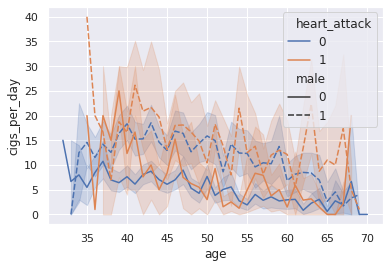

In [37]:
sns.lineplot(x="age", y="cigs_per_day",
             hue="heart_attack", style="male",
             data=df)

# This graph above supports the previous observation, as we can see, older males who smoke a lot have more heart attacks.

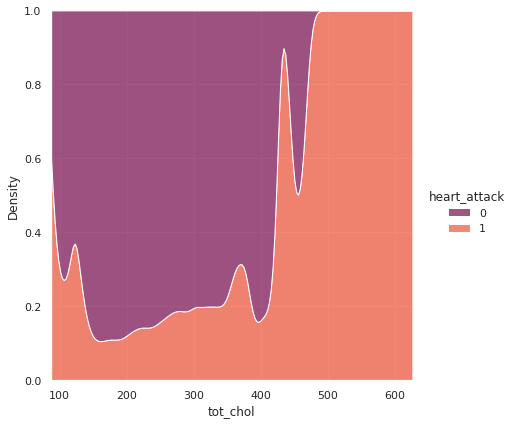

In [31]:
sns.displot(
    data=df,
    x="tot_chol", hue="heart_attack",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="rocket",
)

As we can see, heart attacks occur most frequently on the lower end and mostly the higher end of the cholesterol levels.

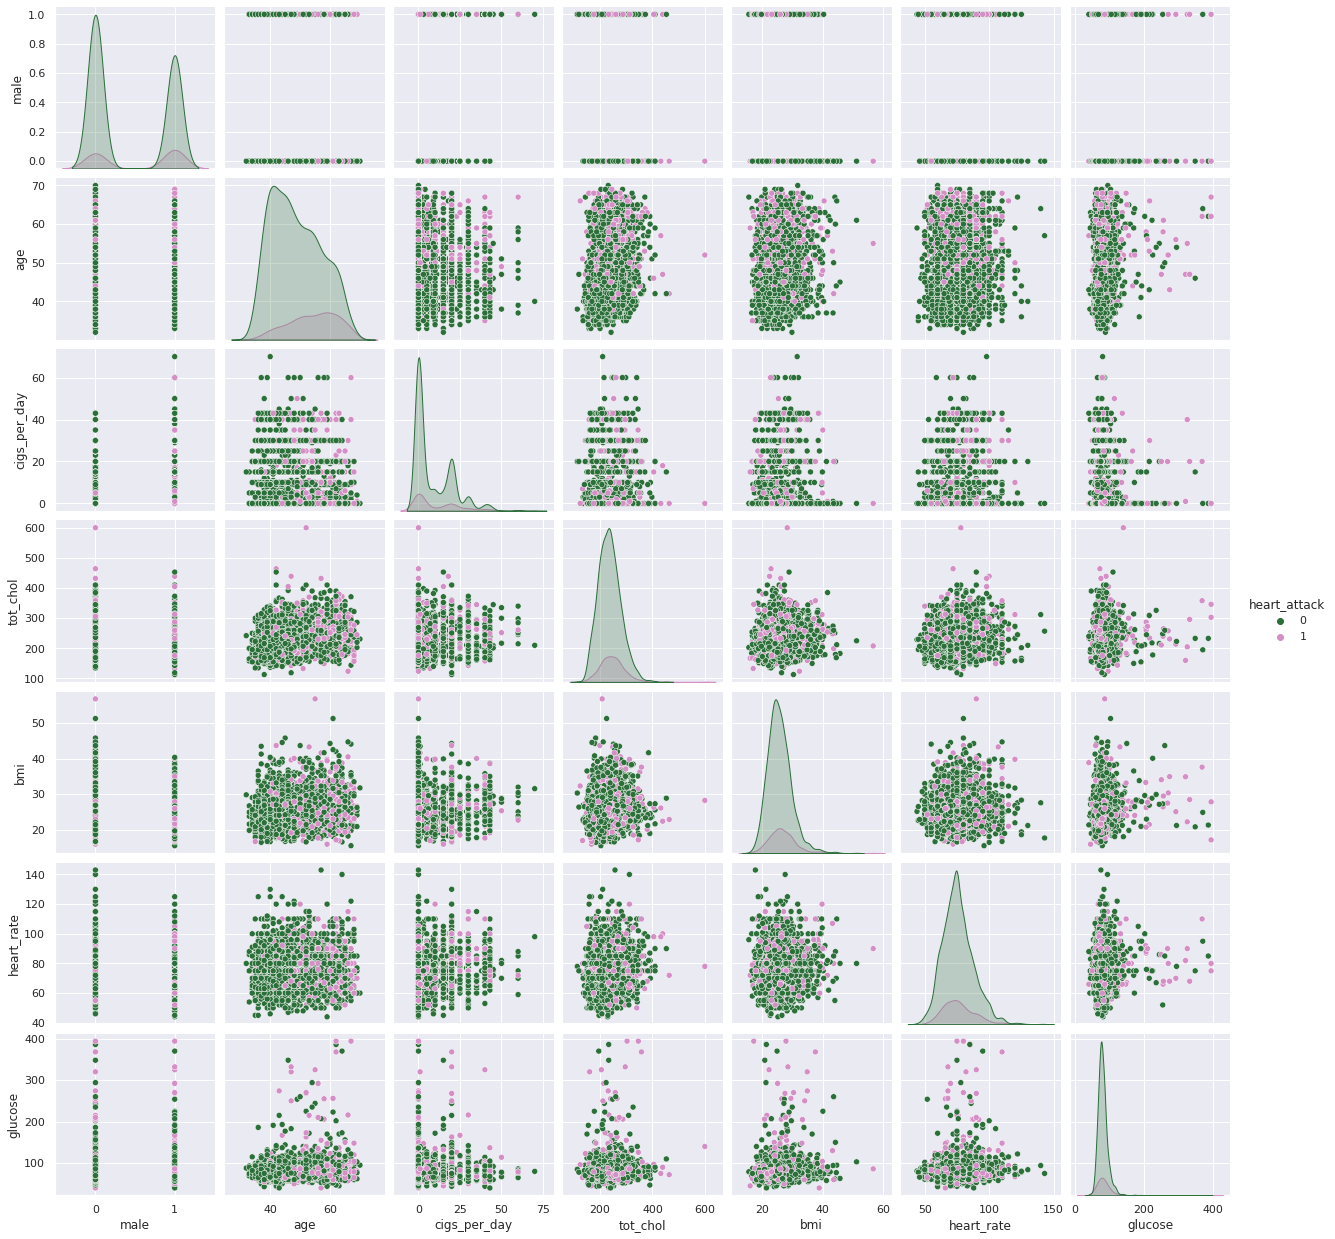

In [20]:
sns.pairplot(df, hue = 'heart_attack', vars = ['male', 'age', 'cigs_per_day',
       'tot_chol', 'bmi', 'heart_rate', 'glucose'], palette='cubehelix')

# Heart attacks seem to occur most often in older people, especially if they have high glucose, bmi, cholesterol, or smoke frequently.

# Logistic Regression Model

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
df.columns

Index(['male', 'age', 'education', 'current_smoker', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'tot_chol', 'sys_bp',
       'dia_bp', 'bmi', 'heart_rate', 'glucose', 'heart_attack'],
      dtype='object')

In [85]:
df.columns[0:15]

Index(['male', 'age', 'education', 'current_smoker', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'tot_chol', 'sys_bp',
       'dia_bp', 'bmi', 'heart_rate', 'glucose'],
      dtype='object')

In [86]:
X = df.iloc[:, [0, 14]].values
y = df.iloc[:, -1].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [90]:
classifier.score(X_test,y_test)

0.8495897903372835

# Diff test size and random state

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.8574979287489644

Increasing the test size and applying random state seems to make the model more accurate

# Keep increasing test size and diff. random state

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 4)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.83515625

changing the random state makes the accuracy lower

# Increase test size but keep random state=1

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.37, random_state = 1)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.8551367331855136

# Again

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 1)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.8585099111414901

# Once more

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.45, random_state = 1)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.8584447144592953

Accuracy seems to cap out at around 86%

# Evaluate LR Model

In [112]:
y_pred = classifier.predict(X_test)

In [113]:
predictions = classifier.predict(X_test)

In [114]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1411
           1       0.58      0.03      0.06       235

    accuracy                           0.86      1646
   macro avg       0.72      0.51      0.49      1646
weighted avg       0.82      0.86      0.80      1646



# Our highest accuracy/f1-score with the Logistic Regression Model yields 86%

# Random Forest Tree Model

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf = RandomForestClassifier(n_estimators = 300)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [122]:
predictions_rfc = rf.predict(X_test)

In [123]:
predictions_rfc = rf.predict(X_test)

In [124]:
print(classification_report(y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1411
           1       0.30      0.05      0.08       235

    accuracy                           0.85      1646
   macro avg       0.58      0.51      0.50      1646
weighted avg       0.78      0.85      0.80      1646



# Accuracy seems decent, let's increase n_estimators

In [126]:
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X_train,y_train)
predictions_rfc = rf.predict(X_test)
predictions_rfc = rf.predict(X_test)
print(classification_report(y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1411
           1       0.30      0.05      0.08       235

    accuracy                           0.85      1646
   macro avg       0.58      0.51      0.50      1646
weighted avg       0.78      0.85      0.80      1646



In [127]:
rf = RandomForestClassifier(n_estimators = 600)
rf.fit(X_train,y_train)
predictions_rfc = rf.predict(X_test)
predictions_rfc = rf.predict(X_test)
print(classification_report(y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1411
           1       0.28      0.05      0.08       235

    accuracy                           0.85      1646
   macro avg       0.57      0.51      0.50      1646
weighted avg       0.78      0.85      0.80      1646



In [128]:
rf = RandomForestClassifier(n_estimators = 800)
rf.fit(X_train,y_train)
predictions_rfc = rf.predict(X_test)
predictions_rfc = rf.predict(X_test)
print(classification_report(y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1411
           1       0.32      0.04      0.07       235

    accuracy                           0.85      1646
   macro avg       0.59      0.51      0.49      1646
weighted avg       0.78      0.85      0.80      1646



# Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [131]:
dtree

DecisionTreeClassifier()

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

In [133]:
predictions = dtree.predict(X_test)

In [134]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1411
           1       0.32      0.04      0.07       235

    accuracy                           0.85      1646
   macro avg       0.59      0.51      0.49      1646
weighted avg       0.78      0.85      0.80      1646



In [135]:
print(confusion_matrix(y_test,predictions))

[[1392   19]
 [ 226    9]]


# Conclusion: Although the highest accuracy with the 3 models only reach 85-86%, we can definetly see that older people who smoke a lot and have high bmi, cholesterol and glucose tend to be the main victims of heart attacks according to our analysis.